hiritsu → f(x)三次関数　
fitting function の導出

備考　
0289.root(元データ)を貰い忘れた＆新たなroot fileを作る前だったので0289_RF.rootで解析している


In [2]:
int ch = 1; //液シン番号

In [3]:
int allch, fastch;
double gain;
switch(ch){
    case 1:
        allch = 1;
        fastch = 2;
        gain = 97.42;
        break;
    case 2:
        allch = 3;
        fastch = 4;
        gain = 94.29;
        break;
    case 3:
        allch = 5;
        fastch = 8;
        gain = 94.61;
        break;
    case 4:
        allch = 9;
        fastch = 10;
        gain = 97.50;
        break;
    case 5:
        allch = 11;
        fastch = 12;
        gain = 96.13;
        break;
    case 6:
        allch = 13;
        fastch = 14;
        gain = 90.52;
        break;
}

In [4]:
//[MeVee]
double allmin = 0;
double allmax = 30; //2200
double fastmin = 0;
double fastmax = 12; //1200
double offset = 4.0;  // allch で offset[MeVee]

Am-Beのデータ

In [5]:
TFile *f = TFile::Open("./../root/0289_RF.root");
TTree *tree = (TTree *)f->Get("tree");

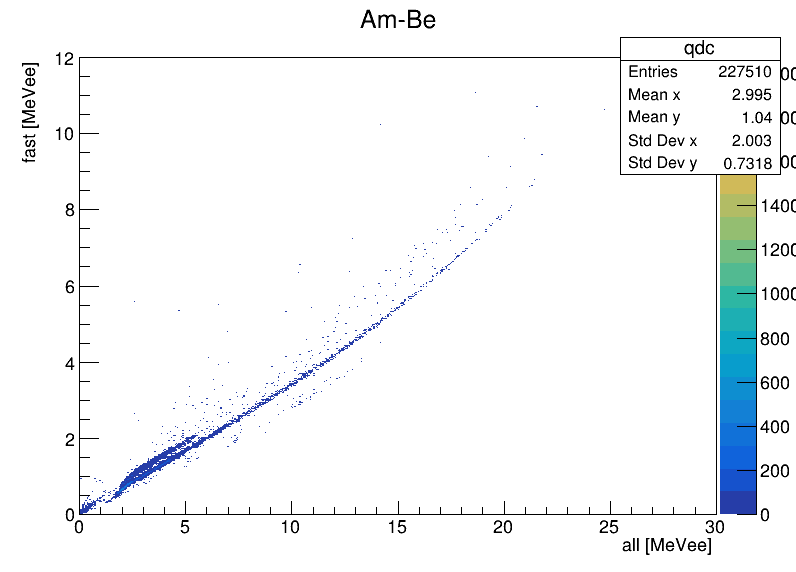

In [6]:
TCanvas *c2 = new TCanvas("c2","c2",800,600);
TH2D *qdc = new TH2D("qdc","qdc",500,allmin,allmax, 500,fastmin,fastmax);
tree->Draw(Form("qdc[%d]/%f:qdc[%d]/%f>>qdc",fastch,gain,allch,gain));

qdc->SetTitle("Am-Be");
qdc->SetXTitle("all [MeVee]");
qdc->SetYTitle("fast [MeVee]");

//qdc->SetStats(0);
qdc->Draw("colz");
c2->Draw();
//c2->SaveAs(Form("./../figure/AmBe_0289_%d.pdf",ch));  /////

C2H4のデータ

In [7]:
TFile *f = TFile::Open("./../root/0313_RF.root");
TTree *tree = (TTree *)f->Get("tree");

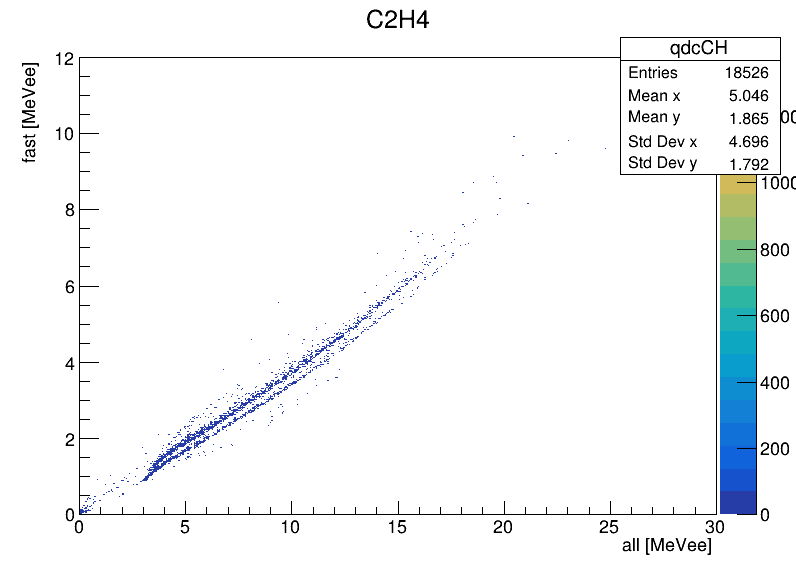

Info in <TCanvas::Print>: pdf file ./../figure/C2H4_0313_1.pdf has been created


In [8]:
TH2D *qdcCH = new TH2D("qdcCH","qdcCH",500,allmin,allmax, 500,fastmin,fastmax);
tree->Draw(Form("qdc[%d]/%f:qdc[%d]/%f>>qdcCH",fastch,gain,allch,gain));

qdcCH->SetTitle("C2H4");
qdcCH->SetXTitle("all [MeVee]");
qdcCH->SetYTitle("fast [MeVee]");

//qdcCH->SetStats(0);
qdcCH->Draw("colz");
//qdcCH->Draw("same");
c2->Draw();
c2->SaveAs(Form("./../figure/C2H4_0313_%d.pdf",ch));  /////

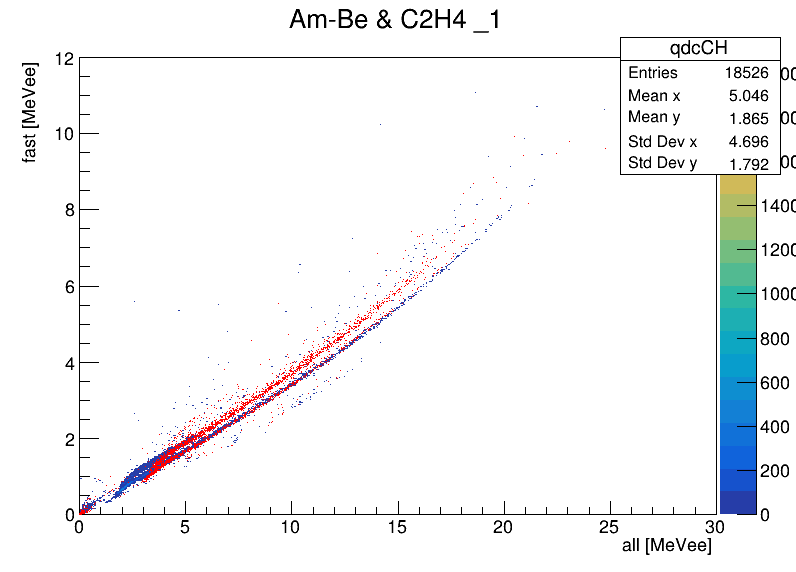

Info in <TCanvas::Print>: pdf file ./../figure/C0313_AB0289_1.pdf has been created


In [9]:
qdc->SetTitle(Form("Am-Be & C2H4 _%d",ch));
qdc->SetXTitle("all [MeVee]");
qdc->SetYTitle("fast [MeVee]");

qdc->Draw("colz");
qdcCH->SetMarkerColor(kRed);
qdc->SetStats(0);
qdcCH->Draw("same");
c2->Draw();
c2->SaveAs(Form("./../figure/C0313_AB0289_%d.pdf",ch));

colz :Am-Be  
red  :C2H4  

液シン6だけ、重ねた時におかしい。ガンマ線同士っぽいところが6だけ重ならない。

液シン1~5 については、C2H4データはnとgと信じて fitting & calbration

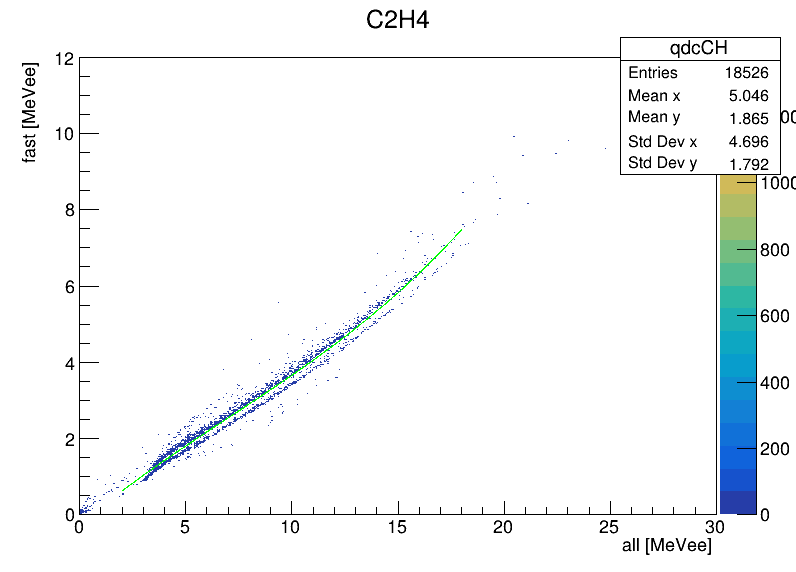


****************************************
Minimizer is Minuit / Migrad
Chi2                      =       199950
NDf                       =         1740
Edm                       =  1.64399e-14
NCalls                    =          113
p0                        =    -0.253859   +/-   0.0647681   
p1                        =     0.465809   +/-   0.0251099   
p2                        =   -0.0142583   +/-   0.00289286  
p3                        =  0.000680912   +/-   0.000101669 
chi2/NDF : 114.914

In [10]:
TF1 *f3 = new TF1("f3","[0] +[1]*x +[2]*x^2 +[3]*x^3",0,3000);
//f3->SetParameter(1,0.35);
f3->SetNpx(1000); //
f3->SetLineWidth(1); //
f3->SetLineColor(3); //
qdcCH->Fit(f3,"","",2,18);
qdcCH->Draw("colz");
//f3->Draw("same");
c2->Draw();
cout << "chi2/NDF : " << f3->GetChisquare()/f3->GetNDF();

In [11]:
double para0 = f3->GetParameter(0);
double para1 = f3->GetParameter(1);
double para2 = f3->GetParameter(2);
double para3 = f3->GetParameter(3);

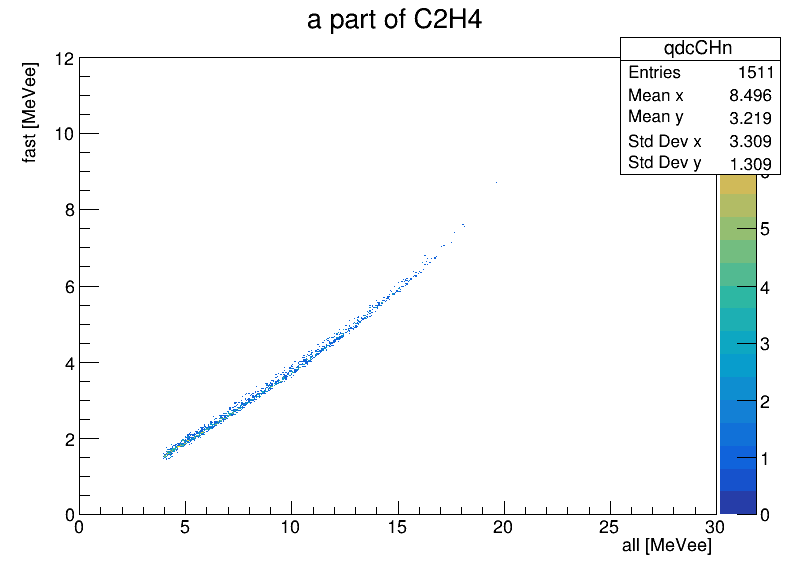

In [12]:

TH2D *qdcCHn = new TH2D("qdcCHn","qdcCHn",500,allmin,allmax, 500,fastmin,fastmax);
tree->Draw(Form("qdc[%d]/%f:qdc[%d]/%f>>qdcCHn",fastch,gain,allch,gain)
           ,Form("(qdc[%d]/%f >%f ) && (qdc[%d]/%f > %f + %f *qdc[%d]/%f + %f *(qdc[%d]/%f)^2 + %f *(qdc[%d]/%f)^3 - %f) && (qdc[%d]/%f < %f + %f *qdc[%d]/%f + %f *(qdc[%d]/%f)^2 + %f *(qdc[%d]/%f)^3 + %f)"
                 ,allch,gain ,offset    ,fastch,gain ,para0 ,para1,allch,gain ,para2,allch,gain  ,para3 ,allch,gain   ,0.06    ,fastch,gain ,para0 ,para1,allch,gain ,para2,allch,gain  ,para3 ,allch,gain ,0.3 ));

qdcCHn->SetTitle("a part of C2H4");
qdcCHn->SetXTitle("all [MeVee]");
qdcCHn->SetYTitle("fast [MeVee]");

qdcCHn->Draw("colz");
c2->Draw();

qdcCHn Entries (中性子らしいものの切り取った時の数) 
1 : 1495 
2 : 1523

In [13]:
//切り取り確認用
/*
qdcCH->Draw("colz");
qdcCHn->SetMarkerColor(kRed);
qdcCHn->Draw("same");
c2->Draw();
*/

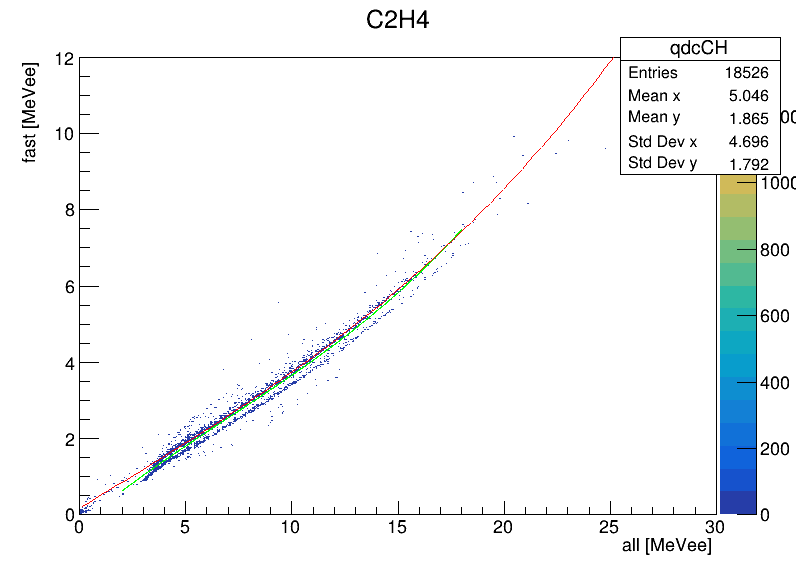


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      10794.8
NDf                       =          938
Edm                       =  2.83865e-14
NCalls                    =          113
p0                        =     0.165683   +/-   0.0448711   
p1                        =     0.343193   +/-   0.0158004   
p2                        = -0.000967882   +/-   0.00170812  
p3                        =  0.000239021   +/-   5.75942e-05 
chi2/NDF : 6.20393

In [14]:
TF1 *f3n = new TF1("f3n","[0] +[1]*x +[2]*x^2 +[3]*x^3 ",0,3000);
qdcCHn->Fit(f3n,"N","",offset,18);
qdcCH->Draw("colz");
f3n->SetLineWidth(1);
f3n->Draw("same");
c2->Draw();
cout << "chi2/NDF : " << f3n->GetChisquare()/f3->GetNDF();

5次の項までやっても、reduced chi-squreは 0.03くらい(1%以下)しか変わらない

In [15]:
double para0n = f3n->GetParameter(0);
double para1n = f3n->GetParameter(1);
double para2n = f3n->GetParameter(2);
double para3n = f3n->GetParameter(3);

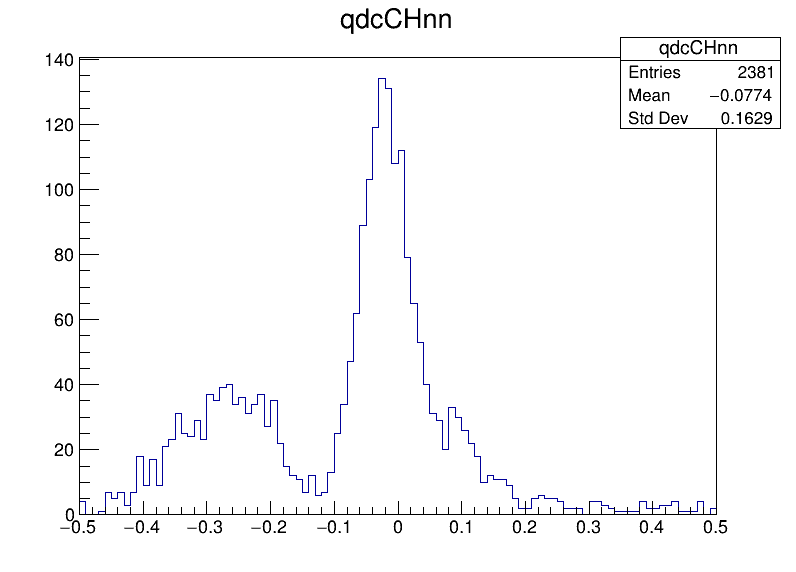

In [16]:
TH1D *qdcCHn = new TH1D("qdcCHnn","qdcCHnn",100,-0.5,0.5);
tree->Draw(Form("qdc[%d]/%f - (%f + %f *qdc[%d]/%f + %f *(qdc[%d]/%f)^2 + %f *(qdc[%d]/%f)^3) >>qdcCHnn"
                ,fastch,gain,para0n,para1n,allch,gain,para2n,allch,gain  ,para3n ,allch,gain)
          ,Form("qdc[%d]/%f > %f"
                ,allch ,gain, offset ));

//qdcCHnn->SetTitle(Form("ng PSD _%d",ch));

qdcCHnn->Draw();
c2->Draw();

In [17]:
cout << qdcCHnn->GetBinContent(0);
//GetEnteries はtree作らんと条件絞るの面倒すぎる

39

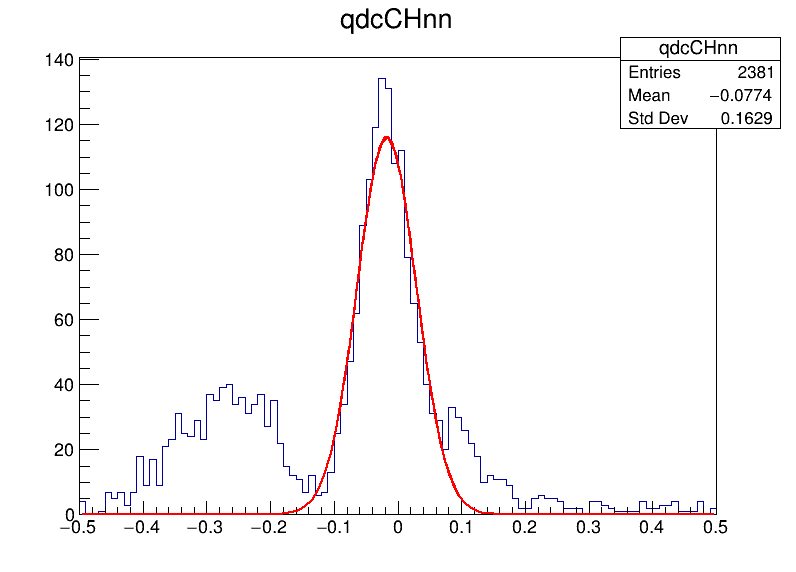

 FCN=53.2514 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=4.63949e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.16030e+02   4.67311e+00   1.16162e-02  -8.40526e-06
   2  Mean        -1.66995e-02   1.43835e-03   5.15524e-06  -6.07332e-02
   3  Sigma        4.63012e-02   1.65906e-03   3.05380e-05  -4.94307e-03


In [18]:
TF1 *g = new TF1("g","gaus(0)",-1,1);
g->SetParameter(0,200);
g->SetParameter(1,0);
g->SetParameter(2,1);
qdcCHnn->Fit("g","","",-0.1,0.1);
g->Draw("same");
c2->Draw();